In [51]:
import numpy as np
import pandas as pd
# Set option manually
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 40)

# Opening Files


- Outcomes:

In [21]:
dfout = pd.read_csv('Data/outcomes.csv')
dfout.head()

,projectid,is_exciting,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
0,ffffc4f85b60efc5b52347df489d0238,f,NaN,f,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN
1,ffffac55ee02a49d1abc87ba6fc61135,f,f,t,t,f,t,f,f,57.0,0.0,7.0
2,ffff97ed93720407d70a2787475932b0,f,f,t,t,t,t,t,f,100.0,0.0,3.0
3,ffff418bb42fad24347527ad96100f81,f,f,f,t,t,f,f,f,100.0,0.0,1.0
4,ffff2d9c769c8fb5335e949c615425eb,t,t,t,t,t,f,t,f,63.0,6.0,2.0


In [22]:
dfout.dtypes

projectid                                          object
is_exciting                                        object
at_least_1_teacher_referred_donor                  object
fully_funded                                       object
at_least_1_green_donation                          object
great_chat                                         object
three_or_more_non_teacher_referred_donors          object
one_non_teacher_referred_donor_giving_100_plus     object
donation_from_thoughtful_donor                     object
great_messages_proportion                         float64
teacher_referred_count                            float64
non_teacher_referred_count                        float64
dtype: object

In [38]:
dfout.isna().sum()

projectid                                              0
is_exciting                                            0
at_least_1_teacher_referred_donor                  94398
fully_funded                                           0
at_least_1_green_donation                          94398
great_chat                                             0
three_or_more_non_teacher_referred_donors          94398
one_non_teacher_referred_donor_giving_100_plus     94398
donation_from_thoughtful_donor                     94398
great_messages_proportion                         179839
teacher_referred_count                             94398
non_teacher_referred_count                         94398
dtype: int64

In [11]:
# Checking unique values in columns to compare with metadata available in Kaggle
for col in dfout.columns:
    report = dfout[col].unique() if col != 'projectid' else dfout[col].nunique()
    print(f"{col} -> {report}")

projectid -> 619326
is_exciting -> ['f' 't']
at_least_1_teacher_referred_donor -> [nan 'f' 't']
fully_funded -> ['f' 't']
at_least_1_green_donation -> [nan 't' 'f']
great_chat -> ['f' 't']
three_or_more_non_teacher_referred_donors -> [nan 't' 'f']
one_non_teacher_referred_donor_giving_100_plus -> [nan 'f' 't']
donation_from_thoughtful_donor -> [nan 'f' 't']
great_messages_proportion -> [ nan  57. 100.  63.   0.  60.  80.  66.  58.  73.  25.  69.  85.  39.
  50.  75.  51.  22.  84.  14.  42.  33.  55.   5.  28.  20.  90.  16.
  88.  83.  17.  54.  45.  81.  40.  56.  44.  46.  62.  31.  64.  59.
  87.  72.   9.  35.  37.  61.  47.  71.  15.  41.  77.  53.  92.  21.
  48.  93.   4.  27.  52.  38.  82.  70.  86.  65.  68.  10.  23.  36.
  18.  11.  98.   7.  30.  12.   8.  43.  78.  89.   6.  91.  26.  76.
  29.   2.  32.  13.  79.   1.  94.  19.  34.  74.  67.  24.  95.   3.
  97.  49.  96.  99.]
teacher_referred_count -> [ nan   0.   6.   1.   2.   3.   4.   7.   5.   8.  10.  16.  15. 

In [150]:
dfout.query("great_messages_proportion.isna()").great_chat.unique()
# great_messages_proportion can be 0 when null

array(['f'], dtype=object)

In [19]:
dfout.query("at_least_1_teacher_referred_donor.isna()")

,projectid,is_exciting,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
0,ffffc4f85b60efc5b52347df489d0238,f,NaN,f,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN
10,fffe700e315373fc1014290cf0c12f51,f,NaN,f,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN
16,fffdfdcf27588d2d32c15c12dec3a2cb,f,NaN,f,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN
27,fffc5f77d0ba9fb9b9510582caa30bdd,f,NaN,f,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN
32,fffba421dc12627bfe04496f7d77082b,f,NaN,f,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
619289,00039d3650a7c39ce6d2af7ad19b0a4f,f,NaN,f,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN
619293,000348912a54e4c684a8a1f20cdfdf45,f,NaN,f,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN
619298,0002dade175ac129d5eb3639fef445ff,f,NaN,f,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN
619307,0001aded1ac8bb36b697786d3a46b54d,f,NaN,f,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
dfout.query("at_least_1_teacher_referred_donor == 'f'")

,projectid,is_exciting,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
1,ffffac55ee02a49d1abc87ba6fc61135,f,f,t,t,f,t,f,f,57.0,0.0,7.0
2,ffff97ed93720407d70a2787475932b0,f,f,t,t,t,t,t,f,100.0,0.0,3.0
3,ffff418bb42fad24347527ad96100f81,f,f,f,t,t,f,f,f,100.0,0.0,1.0
5,fffeebf4827d745aa36b17c2d38d1966,f,f,t,f,f,f,t,f,0.0,0.0,1.0
6,fffee68353ade53e7692b23098096683,f,f,f,f,f,f,f,f,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
619320,0000fa3aa8f6649abab23615b546016d,f,f,t,t,f,t,t,f,40.0,0.0,6.0
619322,0000b38bbc7252972f7984848cf58098,f,f,t,t,f,f,t,f,50.0,0.0,2.0
619323,00002d691c05c51a5fdfbb2baef0ba25,f,f,f,f,t,t,f,f,100.0,0.0,5.0
619324,00002bff514104264a6b798356fdd893,f,f,t,t,f,f,t,f,50.0,0.0,2.0


In [32]:
dfout.reindex(dfout.columns[-3:], axis=1).describe()

,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
count,439487.00000,524928.000000,524928.000000
mean,52.92709,0.777339,4.361290
std,35.71410,2.227933,5.668748
min,0.00000,0.000000,0.000000
25%,25.00000,0.000000,1.000000
50%,50.00000,0.000000,3.000000
75%,83.00000,0.000000,5.000000
max,100.00000,151.000000,304.000000


<Axes: >

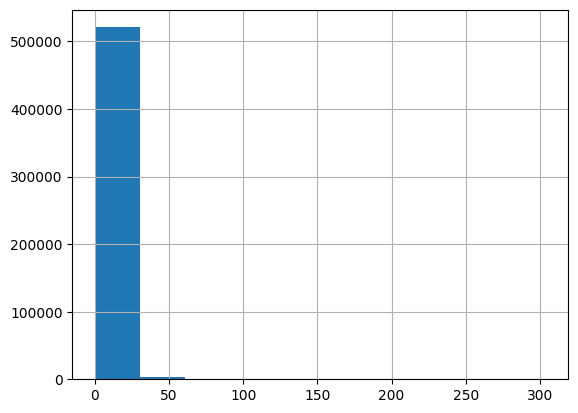

In [37]:
col = 'non_teacher_referred_count'
dfout[col].hist()

- Projects:

In [41]:
dfprj = pd.read_csv('Data/projects.csv')
dfprj

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,school_district,school_county,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,NaN,Selma Unified Sch District,Fresno,f,f,f,f,f,f,Mrs.,f,f,Literature & Writing,Literacy & Language,College & Career Prep,Applied Learning,Books,highest poverty,Grades 6-8,30.0,555.81,653.89,32.0,f,f,2014-05-12
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,4.837020e+11,32.911179,-96.723640,Dallas,TX,75243.0,urban,Richardson Ind School District,Dallas,f,f,f,f,f,f,Mrs.,f,f,Literacy,Literacy & Language,ESL,Literacy & Language,Books,highest poverty,Grades PreK-2,30.0,296.47,348.79,22.0,f,f,2014-05-12
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,4.103270e+11,45.166039,-122.414576,Colton,OR,97017.0,rural,Colton School District 53,Clackamas,f,f,f,f,f,f,Mr.,f,f,Literacy,Literacy & Language,Mathematics,Math & Science,Technology,high poverty,Grades PreK-2,30.0,430.89,506.93,17.0,f,f,2014-05-11
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,3.600153e+11,40.641727,-73.965655,Brooklyn,NY,11226.0,urban,New York City Dept Of Ed,Kings (Brooklyn),f,t,f,f,f,f,Mr.,t,f,Social Sciences,History & Civics,Special Needs,Special Needs,Books,highest poverty,Grades 3-5,30.0,576.07,677.73,12.0,f,f,2014-05-11
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,6.227100e+10,34.043939,-118.288371,Los Angeles,CA,90006.0,urban,Los Angeles Unif Sch Dist,Los Angeles,f,f,f,f,f,f,Ms.,f,f,Mathematics,Math & Science,Literacy,Literacy & Language,Other,highest poverty,Grades PreK-2,30.0,408.40,480.47,24.0,f,f,2014-05-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664093,a7236ea96c812895cafc5d700d779147,c4f90a541cb81e68cd7ad180309985ae,a1e14d253e77ffccc074705527845b4a,3.600081e+11,40.809677,-73.939178,New York,NY,10037.0,urban,New York City Dept Of Ed,New York (Manhattan),f,f,f,f,f,f,Ms.,f,f,Environmental Science,Math & Science,NaN,NaN,Supplies,highest poverty,Grades PreK-2,NaN,231.00,281.71,0.0,f,f,2002-09-17
664094,e02da37beb332eb66c2d2ba989c597ad,d95c94eea994274d614be50bddd89973,bbd70e92262f0f0a342df5d1f3119d8e,3.600097e+11,40.701778,-74.011840,New York,NY,10004.0,urban,Other,New York (Manhattan),f,f,f,f,f,f,Mr.,f,f,Economics,History & Civics,NaN,NaN,Technology,highest poverty,Grades 9-12,NaN,1129.00,1376.83,0.0,f,f,2002-09-17
664095,82e536f14eadf2671a70e03416f695a3,b00d2790934ce7487c99bc9d6e1d5d4d,0c5b1a4b6985dcd42c72b732c774474c,3.600077e+11,40.770233,-73.950760,New York,NY,10075.0,urban,New York City Dept Of Ed,New York (Manhattan),f,t,f,f,f,f,Ms.,f,f,Early Development,Applied Learning,NaN,NaN,Supplies,moderate poverty,Grades 3-5,NaN,125.00,152.44,0.0,f,f,2002-09-16
664096,e139df754a873a62d93daa56acbf8040,e5476c2ef97b33614445a17554535adc,a81c26262a3ad70702a8f14e5329b023,3.600077e+11,40.765517,-73.960090,New York,NY,10065.0,NaN,New York City Dept Of Ed,New York (Manhattan),f,f,f,f,f,f,Ms.,f,f,Literacy,Literacy & Language,NaN,NaN,Books,highest poverty,Grades 9-12,NaN,125.00,152.44,0.0,f,f,2002-09-13


In [50]:
dfprj.dtypes

projectid                                  object
teacher_acctid                             object
schoolid                                   object
school_ncesid                             float64
school_latitude                           float64
school_longitude                          float64
school_city                                object
school_state                               object
school_zip                                float64
school_metro                               object
school_district                            object
school_county                              object
school_charter                             object
school_magnet                              object
school_year_round                          object
school_nlns                                object
school_kipp                                object
school_charter_ready_promise               object
teacher_prefix                             object
teacher_teach_for_america                  object


In [43]:
# Description of projects, unique IDs:
print(dfprj.projectid.nunique())

# Outcomes unique IDs (section above)
print(dfout.projectid.nunique())

664098
619326


In [52]:
dfprj.isna().sum()

projectid                                      0
teacher_acctid                                 0
schoolid                                       0
school_ncesid                              42736
school_latitude                                0
school_longitude                               0
school_city                                    0
school_state                                   0
school_zip                                     4
school_metro                               81908
school_district                              948
school_county                                 17
school_charter                                 0
school_magnet                                  0
school_year_round                              0
school_nlns                                    0
school_kipp                                    0
school_charter_ready_promise                   0
teacher_prefix                                 4
teacher_teach_for_america                      0
teacher_ny_teaching_

<Axes: >

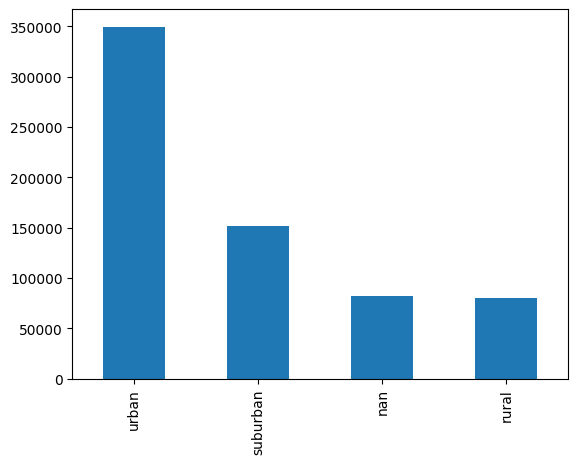

In [60]:
dfprj.school_metro.value_counts(dropna=False).plot.bar()

<Axes: >

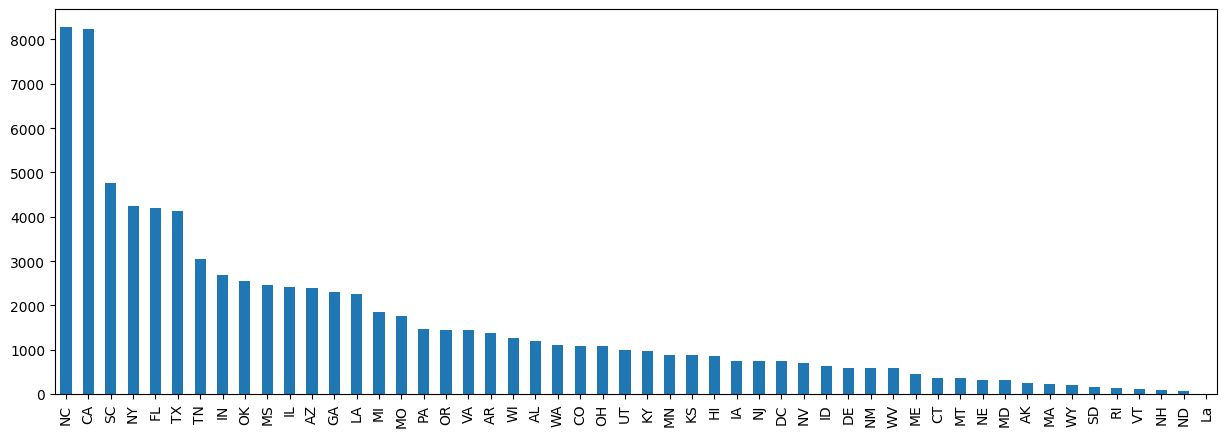

In [166]:
# When is empty, no clue with state as help
dfprj.query("school_metro.isna()").school_state.value_counts().plot.bar(figsize=(15,5))

<Axes: >

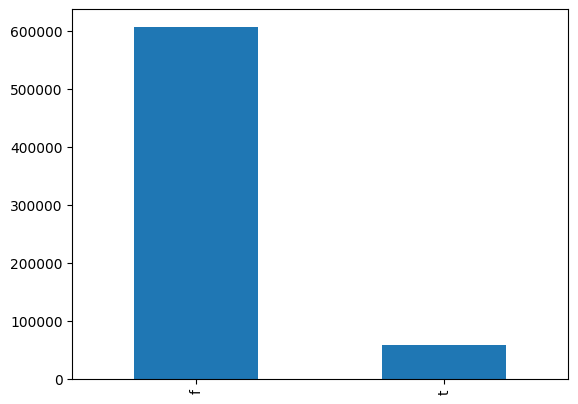

In [61]:
"""
A charter school is a school that receives government funding but operates independently of 
the established state school system in which it is located.
It is independent in the sense that it operates according to the basic principle of 
autonomy for accountability, that it is freed from the rules but accountable for results
"""
dfprj.school_charter.value_counts(dropna=False).plot.bar()

<Axes: >

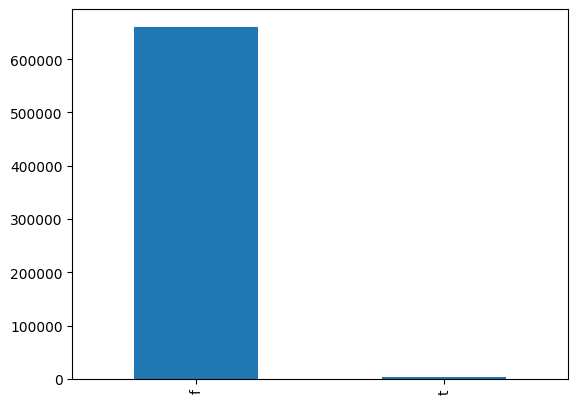

In [152]:
dfprj.school_charter_ready_promise.value_counts(dropna=False).plot.bar()

<Axes: >

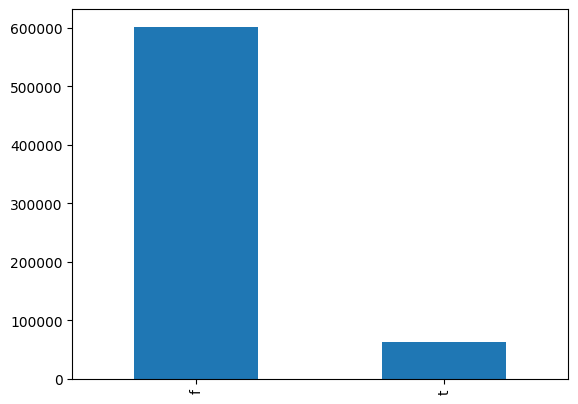

In [62]:
"""
In the U.S. education system, magnet schools are public schools with specialized courses or curricula. 
Normally, a student will attend an elementary school, and this also determines the middle school and high school they attend unless they move. 
"Magnet" refers to how magnet schools accept students from different areas, pulling students out of the normal progression of schools. Attending them is voluntary.
"""
dfprj.school_magnet.value_counts(dropna=False).plot.bar()

<Axes: >

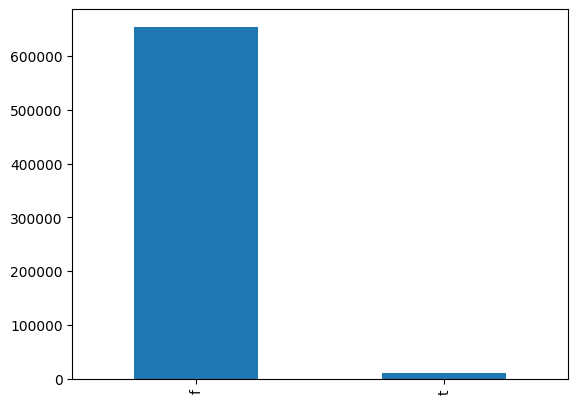

In [154]:
dfprj.school_nlns.value_counts(dropna=False).plot.bar()

<Axes: >

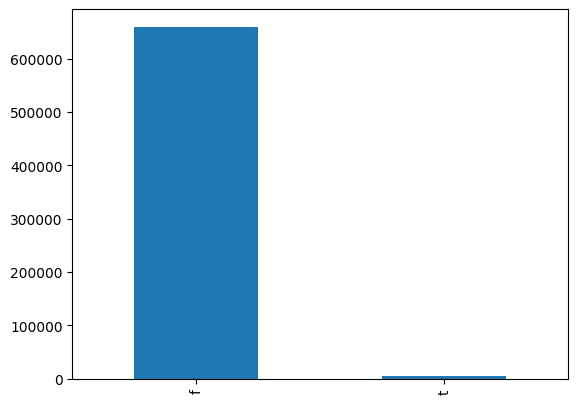

In [155]:
dfprj.school_kipp.value_counts(dropna=False).plot.bar()

<Axes: >

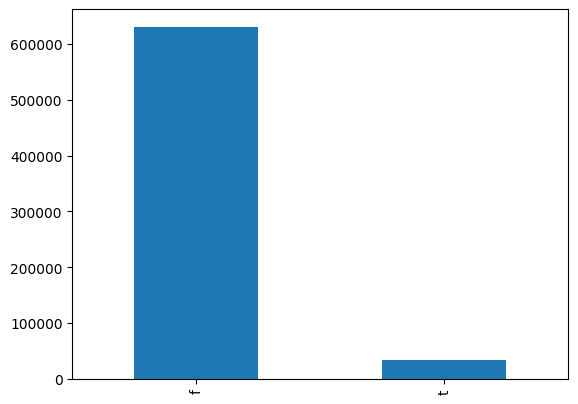

In [159]:
dfprj.school_year_round.value_counts(dropna=False).plot.bar()

<Axes: >

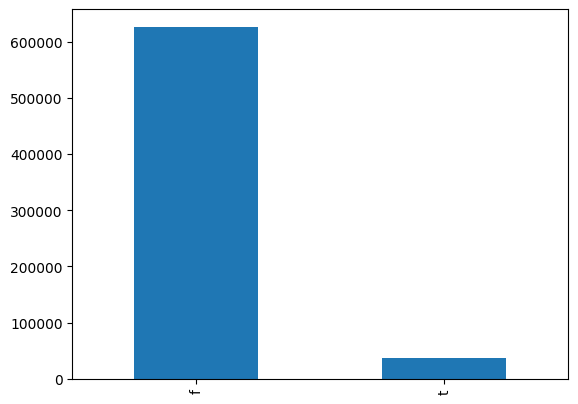

In [63]:
dfprj.teacher_teach_for_america.value_counts(dropna=False).plot.bar()

<Axes: >

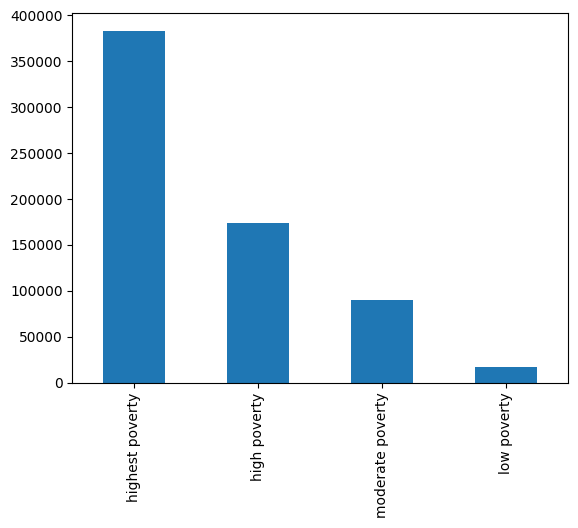

In [64]:
dfprj.poverty_level.value_counts(dropna=False).plot.bar()

<Axes: >

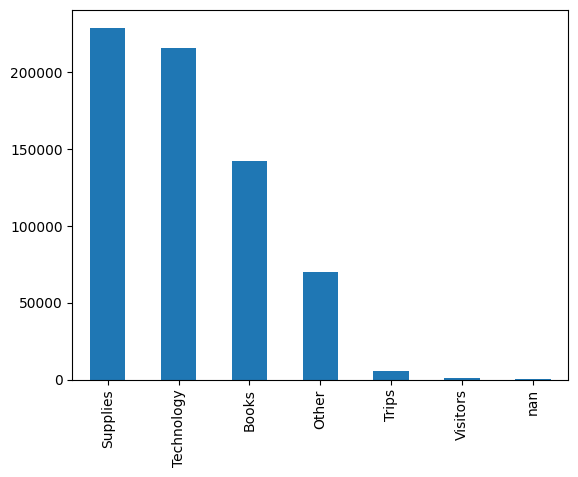

In [59]:
dfprj.resource_type.value_counts(dropna=False).plot.bar()

<Axes: >

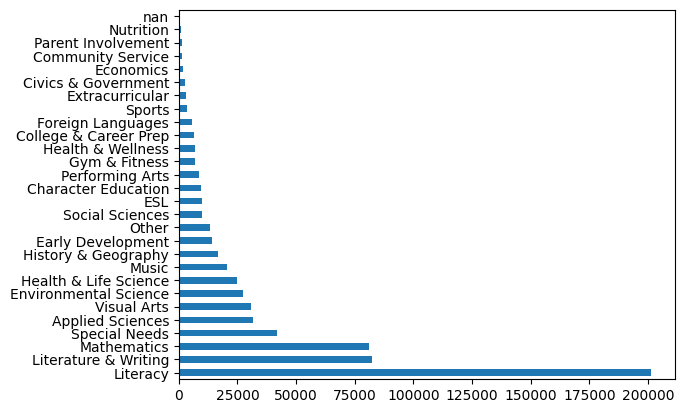

In [67]:
dfprj.primary_focus_subject.value_counts(dropna=False).plot.barh()

<Axes: >

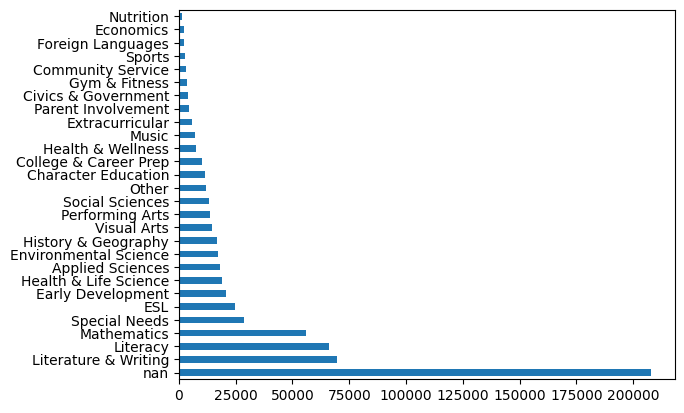

In [69]:
dfprj.secondary_focus_subject.value_counts(dropna=False).plot.barh()# Nulls in first place

<Axes: >

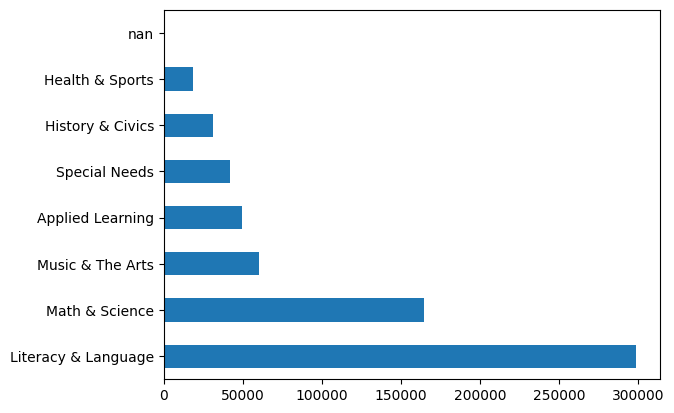

In [68]:
dfprj.primary_focus_area.value_counts(dropna=False).plot.barh()

<Axes: >

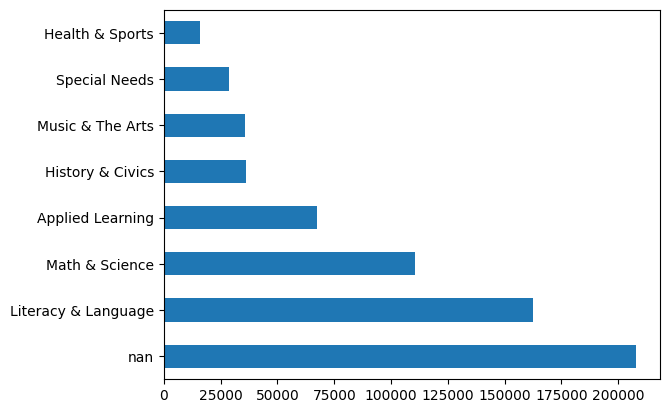

In [71]:
dfprj.secondary_focus_area.value_counts(dropna=False).plot.barh()# Nulls in first place

<Axes: >

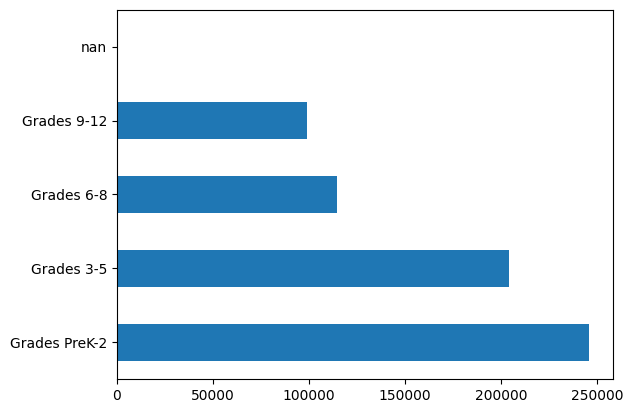

In [72]:
dfprj.grade_level.value_counts(dropna=False).plot.barh()

In [85]:
dfprj.loc[ :, ['fulfillment_labor_materials', 'total_price_excluding_optional_support', 'total_price_including_optional_support', 'students_reached'] ].describe().T

,count,mean,std,min,25%,50%,75%,max
fulfillment_labor_materials,629016.0,27.495822,8.663046,9.0,17.0,30.00,35.0000,35.00
total_price_excluding_optional_support,664098.0,542.041520,12677.383883,0.0,267.2,411.00,586.4900,10250017.00
total_price_including_optional_support,664098.0,644.712845,15458.631886,0.0,317.5,487.84,696.3875,12500020.73
students_reached,663952.0,97.233547,2283.327661,0.0,22.0,30.00,100.0000,999999.00


In [86]:
dfprj.loc[ :, ['fulfillment_labor_materials', 'total_price_excluding_optional_support', 'total_price_including_optional_support', 'students_reached'] ].corr()

,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached
fulfillment_labor_materials,1.000000,-0.000390,-0.000985,-0.002967
total_price_excluding_optional_support,-0.000390,1.000000,0.999998,0.000559
total_price_including_optional_support,-0.000985,0.999998,1.000000,0.000549
students_reached,-0.002967,0.000559,0.000549,1.000000


array([[<Axes: title={'center': 'fulfillment_labor_materials'}>,
        <Axes: title={'center': 'total_price_excluding_optional_support'}>],
       [<Axes: title={'center': 'total_price_including_optional_support'}>,
        <Axes: title={'center': 'students_reached'}>]], dtype=object)

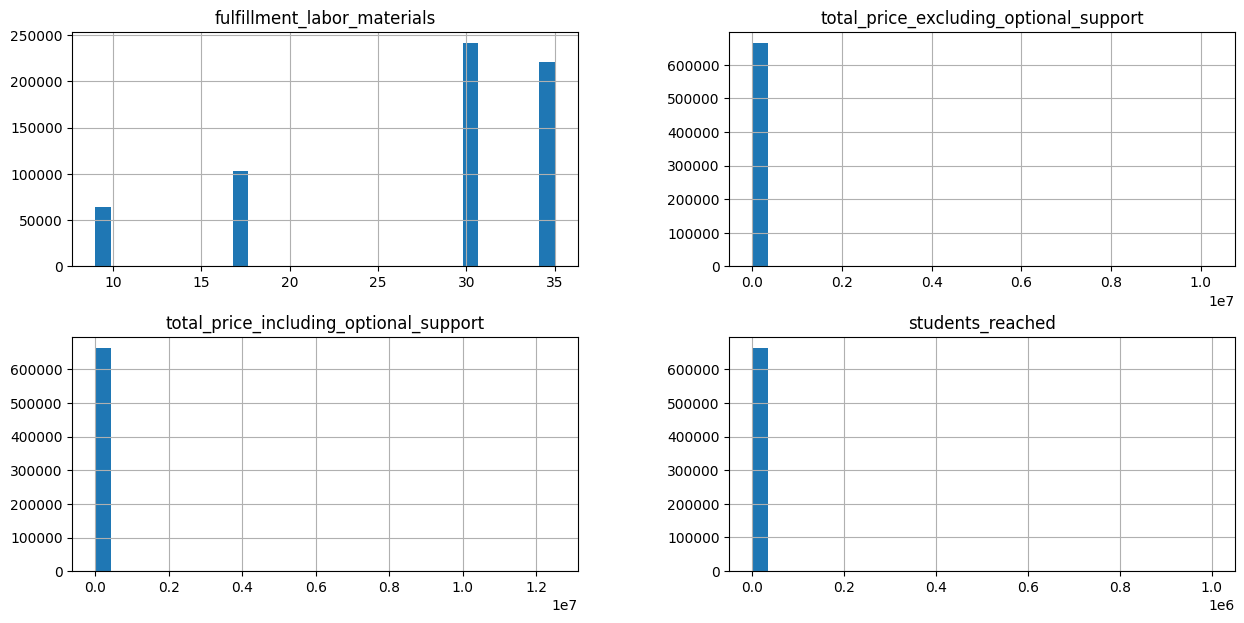

In [91]:
dfprj[['fulfillment_labor_materials', 'total_price_excluding_optional_support', 'total_price_including_optional_support', 'students_reached']].hist(figsize=(15,7), bins=30)

<Axes: >

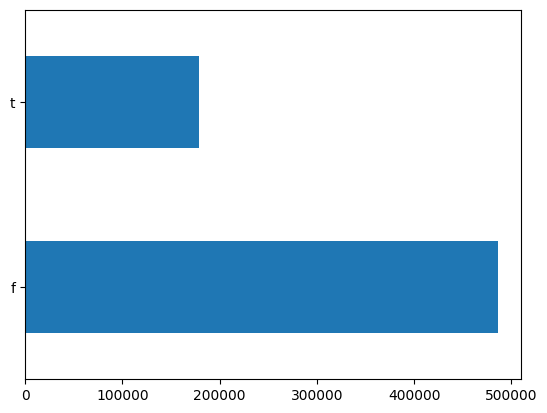

In [93]:
dfprj.eligible_double_your_impact_match.value_counts(dropna=False).plot.barh()#	

<Axes: >

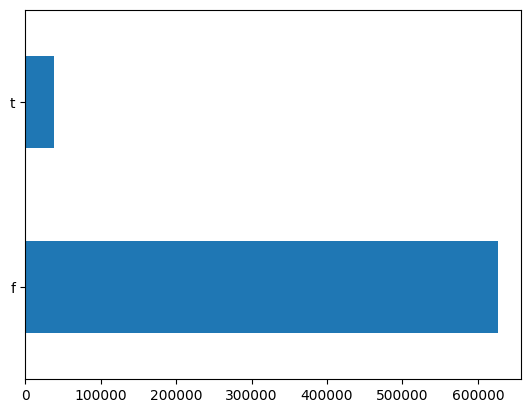

In [94]:
dfprj.eligible_almost_home_match.value_counts(dropna=False).plot.barh()

<Axes: title={'center': 'Projects Posted over time'}>

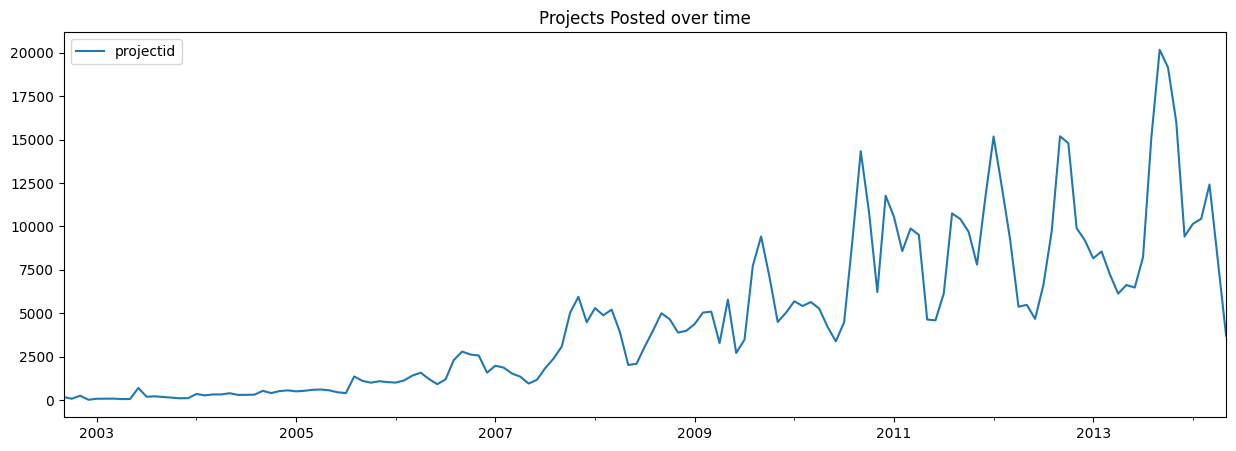

In [112]:
(dfprj
        .loc[:, ['projectid', 'date_posted']]
        .astype({'date_posted':np.datetime64})
        .groupby( by=pd.Grouper(key='date_posted', freq='MS') )
        .count()
        .plot.line(figsize=(15,5), title='Projects Posted over time', xlabel='')
        )

- Essays

In [113]:
dfess = pd.read_csv('Data/essays.csv')
dfess

,projectid,teacher_acctid,title,short_description,need_statement,essay
0,ffffc4f85b60efc5b52347df489d0238,c24011b20fc161ed02248e85beb59a90,iMath,It is imperative that teachers bring technolog...,My students need four iPods.,I am a fourth year fifth grade math teacher. T...
1,ffffac55ee02a49d1abc87ba6fc61135,947066d0af47e0566f334566553dd6a6,Recording Rockin' Readers,Can you imagine having to translate everything...,My students need a camcorder.,Can you imagine having to translate everything...
2,ffff97ed93720407d70a2787475932b0,462270f5d5c212162fcab11afa2623cb,Kindergarten In Need of Important Materials!,It takes a special person to donate to a group...,My students need 17 assorted classroom materia...,Hi. I teach a wonderful group of 4-5 year old ...
3,ffff7266778f71242675416e600b94e1,b9a8f14199e0d8109200ece179281f4f,Let's Find Out!,My Kindergarten students come from a variety o...,"My students need 25 copies of Scholastic's ""Le...",My Kindergarten students come from a variety o...
4,ffff418bb42fad24347527ad96100f81,e885fb002a1d0d39aaed9d21a7683549,Whistle While We Work!,"By using the cross curricular games requested,...",My students need grade level appropriate games...,All work and no play makes school a dull place...
...,...,...,...,...,...,...
664093,0000ee613c92ddc5298bf63142996a5c,e0c0a0214d3c2cfdc0ab6639bc3c5342,Technology Upgrade A Must-Kindergartners Ready!,Kindergarten is an exciting time for learning ...,My students need an iPad mini to support instr...,Kindergarten is an exciting time for learning ...
664094,0000b38bbc7252972f7984848cf58098,e1aa1ae5301d0cda860c4d9c89c24919,Visual Display Technology in the Classroom,My students have very limited exposure to tech...,My students need access to a projector in the ...,My students have very limited exposure to tech...
664095,00002d691c05c51a5fdfbb2baef0ba25,7ad6abc974dd8b62773f79f6cbed48d5,You Go Read at HRS,"My students need high quality books, such as W...","My students need high quality books, such as W...",Our students need the challenge to read high q...
664096,00002bff514104264a6b798356fdd893,3414541eb63108700b188648f866f483,Speedy Shark Reading Club,My students need more incentives to make them ...,My students need word building centers 20 At-Y...,My students need more incentives to make them ...


- resources

In [114]:
dfres = pd.read_csv('Data/resources.csv')
dfres

,resourceid,projectid,vendorid,vendor_name,project_resource_type,item_name,item_number,item_unit_price,item_quantity
0,8a1c1c45bc30d065061912fd9114fcf3,ffffc4f85b60efc5b52347df489d0238,430.0,Woodwind and Brasswind,Technology,iPod nano 4th Gen 8GB (Black),249995.001,149.00,4.0
1,015d2c4935c50427964a12dc3f584091,ffffac55ee02a49d1abc87ba6fc61135,82.0,Best Buy for Business,Technology,Sony bloggie MHS-FS1 - camcorder - internal fl...,BB11216668,148.00,1.0
2,26a02944b2f0c25f9abdeacca3ede3ee,ffff97ed93720407d70a2787475932b0,767.0,Lakeshore Learning Materials,Supplies,VX748 - Best-Buy Jumbo Crayons - 12-Color Box,VX748,69.95,1.0
3,7fef1f92cb4447d18d599f69ea27e833,ffff97ed93720407d70a2787475932b0,767.0,Lakeshore Learning Materials,Supplies,LA138 - Best-Buy Write & Wipe Broad-Tip Marker...,LA138,34.95,1.0
4,8dccf77df25ee615bb1a68b98ba9d861,ffff97ed93720407d70a2787475932b0,767.0,Lakeshore Learning Materials,Supplies,BJ7471 - 1 1/2&#34; Ruled Chart Tablet,BJ7471,10.95,4.0
...,...,...,...,...,...,...,...,...,...
3667212,ac02e8778210961c823afddc606c6059,00001ccc0e81598c4bd86bacb94d7acb,767.0,Lakeshore Learning Materials,Supplies,AA887 - Face-Painting Stampers Set,AA887,14.99,1.0
3667213,0e8457adce345738b8130ca40c5b5f07,00001ccc0e81598c4bd86bacb94d7acb,767.0,Lakeshore Learning Materials,Supplies,SD748 - Extra 1/2&#34; Tape Pack,SD748,24.50,1.0
3667214,532841b668aa3f58d15fcc56f974a466,00001ccc0e81598c4bd86bacb94d7acb,767.0,Lakeshore Learning Materials,Supplies,RA132 - Foam Paint Rollers,RA132,12.99,1.0
3667215,95bd39e0a66c5ec21aa771f856aee86d,00001ccc0e81598c4bd86bacb94d7acb,767.0,Lakeshore Learning Materials,Supplies,EV212 - Regular Dot Art Painters - 6-Color Set,EV212,14.99,2.0


In [117]:
dfres.isna().sum()

resourceid                    0
projectid                     0
vendorid                 108269
vendor_name              108296
project_resource_type       196
item_name                 13711
item_number               25820
item_unit_price           13894
item_quantity              8310
dtype: int64

In [118]:
dfres.query("item_quantity.isna()")

,resourceid,projectid,vendorid,vendor_name,project_resource_type,item_name,item_number,item_unit_price,item_quantity
429,3a99b21e568f505f50ca80799b16edc1,fff6df6b3cba00f54a7d64492c97f847,NaN,NaN,Books,NaN,NaN,NaN,NaN
438,e2118b86e1a216f4bfc1fe210a895e8a,fff63030c1a2b9de164d91fa26e0ec16,NaN,NaN,Trips,NaN,NaN,NaN,NaN
573,ed18f55c1fad9c98e67e01022493f958,fff3bf834686b20ed7e518e7521b4a36,NaN,NaN,Trips,NaN,NaN,NaN,NaN
721,6b1c53395ba2976bcebb6114a3cd6c90,fff1d45a6b62711fad80fb0ac84ec7d2,NaN,NaN,Supplies,NaN,NaN,NaN,NaN
724,2c005aeb0f906a64a8512f17517fc1df,fff1d45a6b62711fad80fb0ac84ec7d2,NaN,NaN,Supplies,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3663255,f8c9ffc3ee4977794ec1670c32fc8ff9,004371c61d1884a6818888e27b0582b6,NaN,NaN,Trips,NaN,NaN,NaN,NaN
3663257,b5dcfaa5867cf54adca5121800c819e3,004342c1797bfb551835889401e78555,NaN,NaN,Trips,NaN,NaN,NaN,NaN
3665513,a6cfb4015a1609aea18b43b17b05b02b,001c87f75f9059a506a441cfd6dc2786,NaN,NaN,Trips,NaN,NaN,NaN,NaN
3665797,dd93003f888fd74fdaa962cf0cfc0e08,0015f2b0b08f2335837352abf3f4f313,NaN,NaN,Trips,NaN,NaN,NaN,NaN


In [119]:
dfres.query("item_unit_price.isna()")

,resourceid,projectid,vendorid,vendor_name,project_resource_type,item_name,item_number,item_unit_price,item_quantity
396,e65adca8d0cfcb855ab7b3ab13dc049a,fff6f431d25fe6dcabd093fa038ebc25,NaN,NaN,Books,NaN,NaN,NaN,1.0
397,3237ed8d32feb8611a79282cffcbd458,fff6f431d25fe6dcabd093fa038ebc25,NaN,NaN,Books,NaN,NaN,NaN,1.0
398,c5ce2923b529d10a20e893b549124b25,fff6f431d25fe6dcabd093fa038ebc25,NaN,NaN,Books,NaN,NaN,NaN,1.0
399,4d85bc71d0b30a6cfceb6467f13fc747,fff6f431d25fe6dcabd093fa038ebc25,NaN,NaN,Books,NaN,NaN,NaN,1.0
400,c0b02a7cc30b63e4b9baa69f79556793,fff6f431d25fe6dcabd093fa038ebc25,NaN,NaN,Books,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...
3663255,f8c9ffc3ee4977794ec1670c32fc8ff9,004371c61d1884a6818888e27b0582b6,NaN,NaN,Trips,NaN,NaN,NaN,NaN
3663257,b5dcfaa5867cf54adca5121800c819e3,004342c1797bfb551835889401e78555,NaN,NaN,Trips,NaN,NaN,NaN,NaN
3665513,a6cfb4015a1609aea18b43b17b05b02b,001c87f75f9059a506a441cfd6dc2786,NaN,NaN,Trips,NaN,NaN,NaN,NaN
3665797,dd93003f888fd74fdaa962cf0cfc0e08,0015f2b0b08f2335837352abf3f4f313,NaN,NaN,Trips,NaN,NaN,NaN,NaN


In [133]:
(dfres
    .assign(item_quantity = dfres.item_quantity.fillna(1.0)) # some items with price but no quantity
    .loc[ dfres.item_unit_price.notnull(), ['projectid', 'item_unit_price', 'item_quantity'] ] # also, some items without price (mostly marked as books and others)
    .pipe( lambda _df: _df.assign(RequestPrice = _df.item_unit_price * _df.item_quantity) )
    .loc[:, ['projectid', 'RequestPrice'] ]
    .groupby(by='projectid')
    .sum()
    .describe()
    )

,RequestPrice
count,6.556680e+05
mean,1.140747e+03
std,5.539287e+05
min,0.000000e+00
25%,2.172300e+02
50%,3.490000e+02
75%,4.999900e+02
max,4.484220e+08


In [142]:
(dfres
    .assign(item_quantity = dfres.item_quantity.fillna(1.0)) # some items with price but no quantity
    .loc[ 
            (dfres.item_unit_price.notnull() & dfres.project_resource_type.notnull() & (dfres.item_unit_price>0) ), 
            ['project_resource_type', 'item_unit_price', 'item_quantity'] 
        ] # some items without price (mostly marked as books and others), no resource description and negative price.
    #.isna().sum()
    #.query("project_resource_type.isna()")
    .pipe( lambda _df: _df.assign(RequestPrice = _df.item_unit_price * _df.item_quantity) )
    .loc[:, ['project_resource_type', 'RequestPrice'] ]
    .groupby(by='project_resource_type')
    .describe()
    )

RequestPrice                                          \
                             count        mean            std   min    25%   
project_resource_type                                                        
Books                    1570199.0  318.489465  357857.407669  0.00   5.97   
Other                     262937.0  141.213668   19511.076445  0.01  19.95   
Supplies                 1339114.0   61.281241     135.609854  0.00  13.29   
Technology                477046.0  269.540080     818.894660  0.00  29.99   
Trips                        567.0   77.150388     167.121726  0.61  10.95   
Visitors                     208.0   86.771250     161.604746  2.91  13.68   

                                                      
                          50%      75%           max  
project_resource_type                                 
Books                   11.67   25.760  4.484216e+08  
Other                   39.50  104.650  1.000000e+07  
Supplies                28.49   59.970  3.217800e+04  
Technology             119.99  359.990  3.886176e+05  
Trips                   23.35   65.875  1.649000e+03  
Visitors                28.49   99.000  1.249990e+03

In [141]:
dfres.query("(item_unit_price < 0) or (item_quantity < 0)") # negative prices

,resourceid,projectid,vendorid,vendor_name,project_resource_type,item_name,item_number,item_unit_price,item_quantity
58605,8a3ee3e8f59d0941e15ea97214af931d,fbf357e968108f5aa56c98fdf037abab,430.0,Woodwind and Brasswind,Other,"10% off entire order for DCI Fans, Friends & M...",NaN,-22.00,1.0
692125,f1a9b00c95c6d2ca3514e87cfc87758c,cf490d118844bd6022c48fcdf0d71d13,430.0,Woodwind and Brasswind,Supplies,WWBW - Take 15% Off All Items With a Green Tag!,NaN,-99.60,1.0
949413,f395db72434b824534c094789b8a163f,bd53f49b910786ad7dce4aa515bfcbda,430.0,Woodwind and Brasswind,Supplies,WWBW - Take 15% Off All Items With a Green Tag!,NaN,-26.05,1.0
2104621,d7bd0a25fad3fad076abe4d8b717d0d9,6d16a3eb8ed8627ce7fb5ea82538733d,430.0,Woodwind and Brasswind,Other,WWBW - Take 15% Off All Items With a Green Tag!,NaN,-55.90,1.0
2104622,0465f2012332475a3ff78ccc7612cf56,6d16a3eb8ed8627ce7fb5ea82538733d,430.0,Woodwind and Brasswind,Other,WWBW - Take 15% Off All Items With a Green Tag!,NaN,-22.00,1.0
2158895,6c9de7e868938dd39249ef252aea76ac,6947262dd0e5a24ddb9d71ed9dec9520,430.0,Woodwind and Brasswind,Other,"10% off entire order for DCI Fans, Friends & M...",NaN,-15.00,1.0
2201789,387d6f15f61f0985b3bd1216c5f1cd96,664acc3bfd6a16daf131cdab5a5d4a9e,430.0,Woodwind and Brasswind,Supplies,"10% off entire order for DCI Fans, Friends & M...",NaN,-83.00,1.0
2623621,af072ad1e7d1e3d36a20edbf4ef02cbd,49071805bf9965852b084e24e0ee115b,430.0,Woodwind and Brasswind,Supplies,"10% off entire order for DCI Fans, Friends & M...",NaN,-39.60,1.0
2804489,53d38ab1b460c2aad6610b48e0f88949,3c8ec1b8d71465359a028178f67bf9f1,430.0,Woodwind and Brasswind,Technology,WWBW - Take 15% Off All Items With a Green Tag!,NaN,-5.49,1.0
2864662,fc9f9ee5ca304f04a740816cac966284,385b9f8452ab378c77c7d0fb66f106db,430.0,Woodwind and Brasswind,Supplies,WWBW - Take 15% Off All Items With a Green Tag!,NaN,-63.43,1.0
